<Figure size 800x500 with 0 Axes>

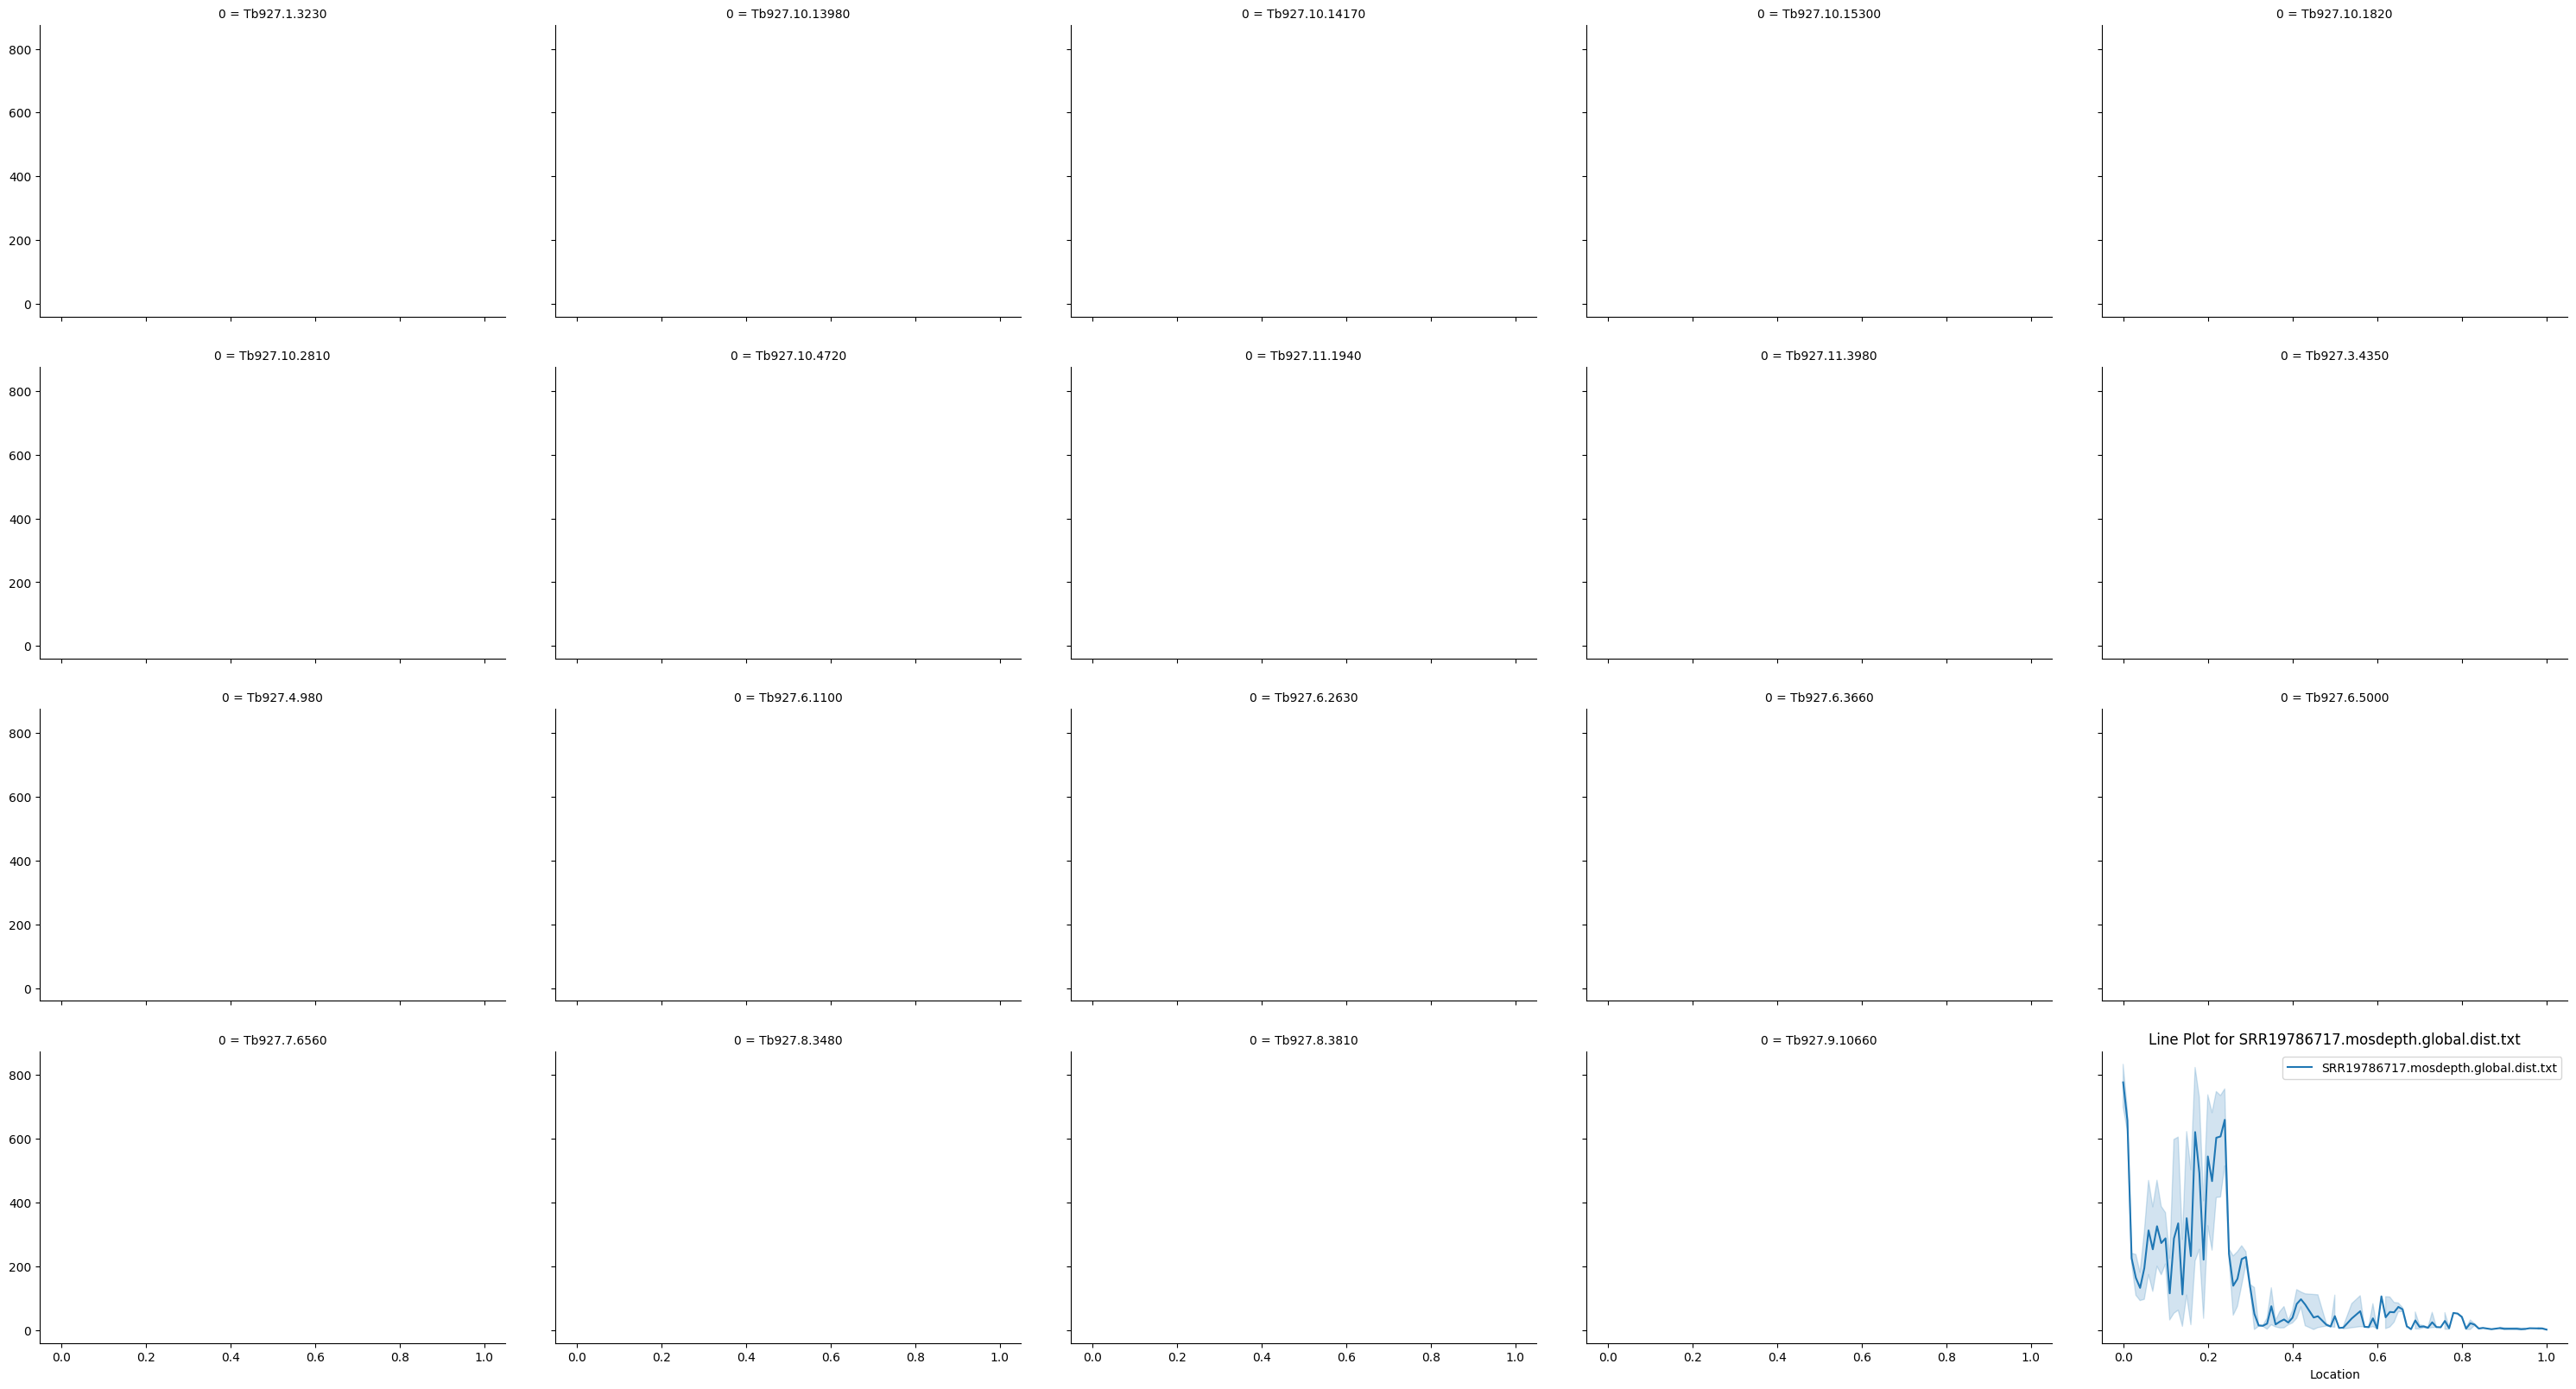

<Figure size 800x500 with 0 Axes>

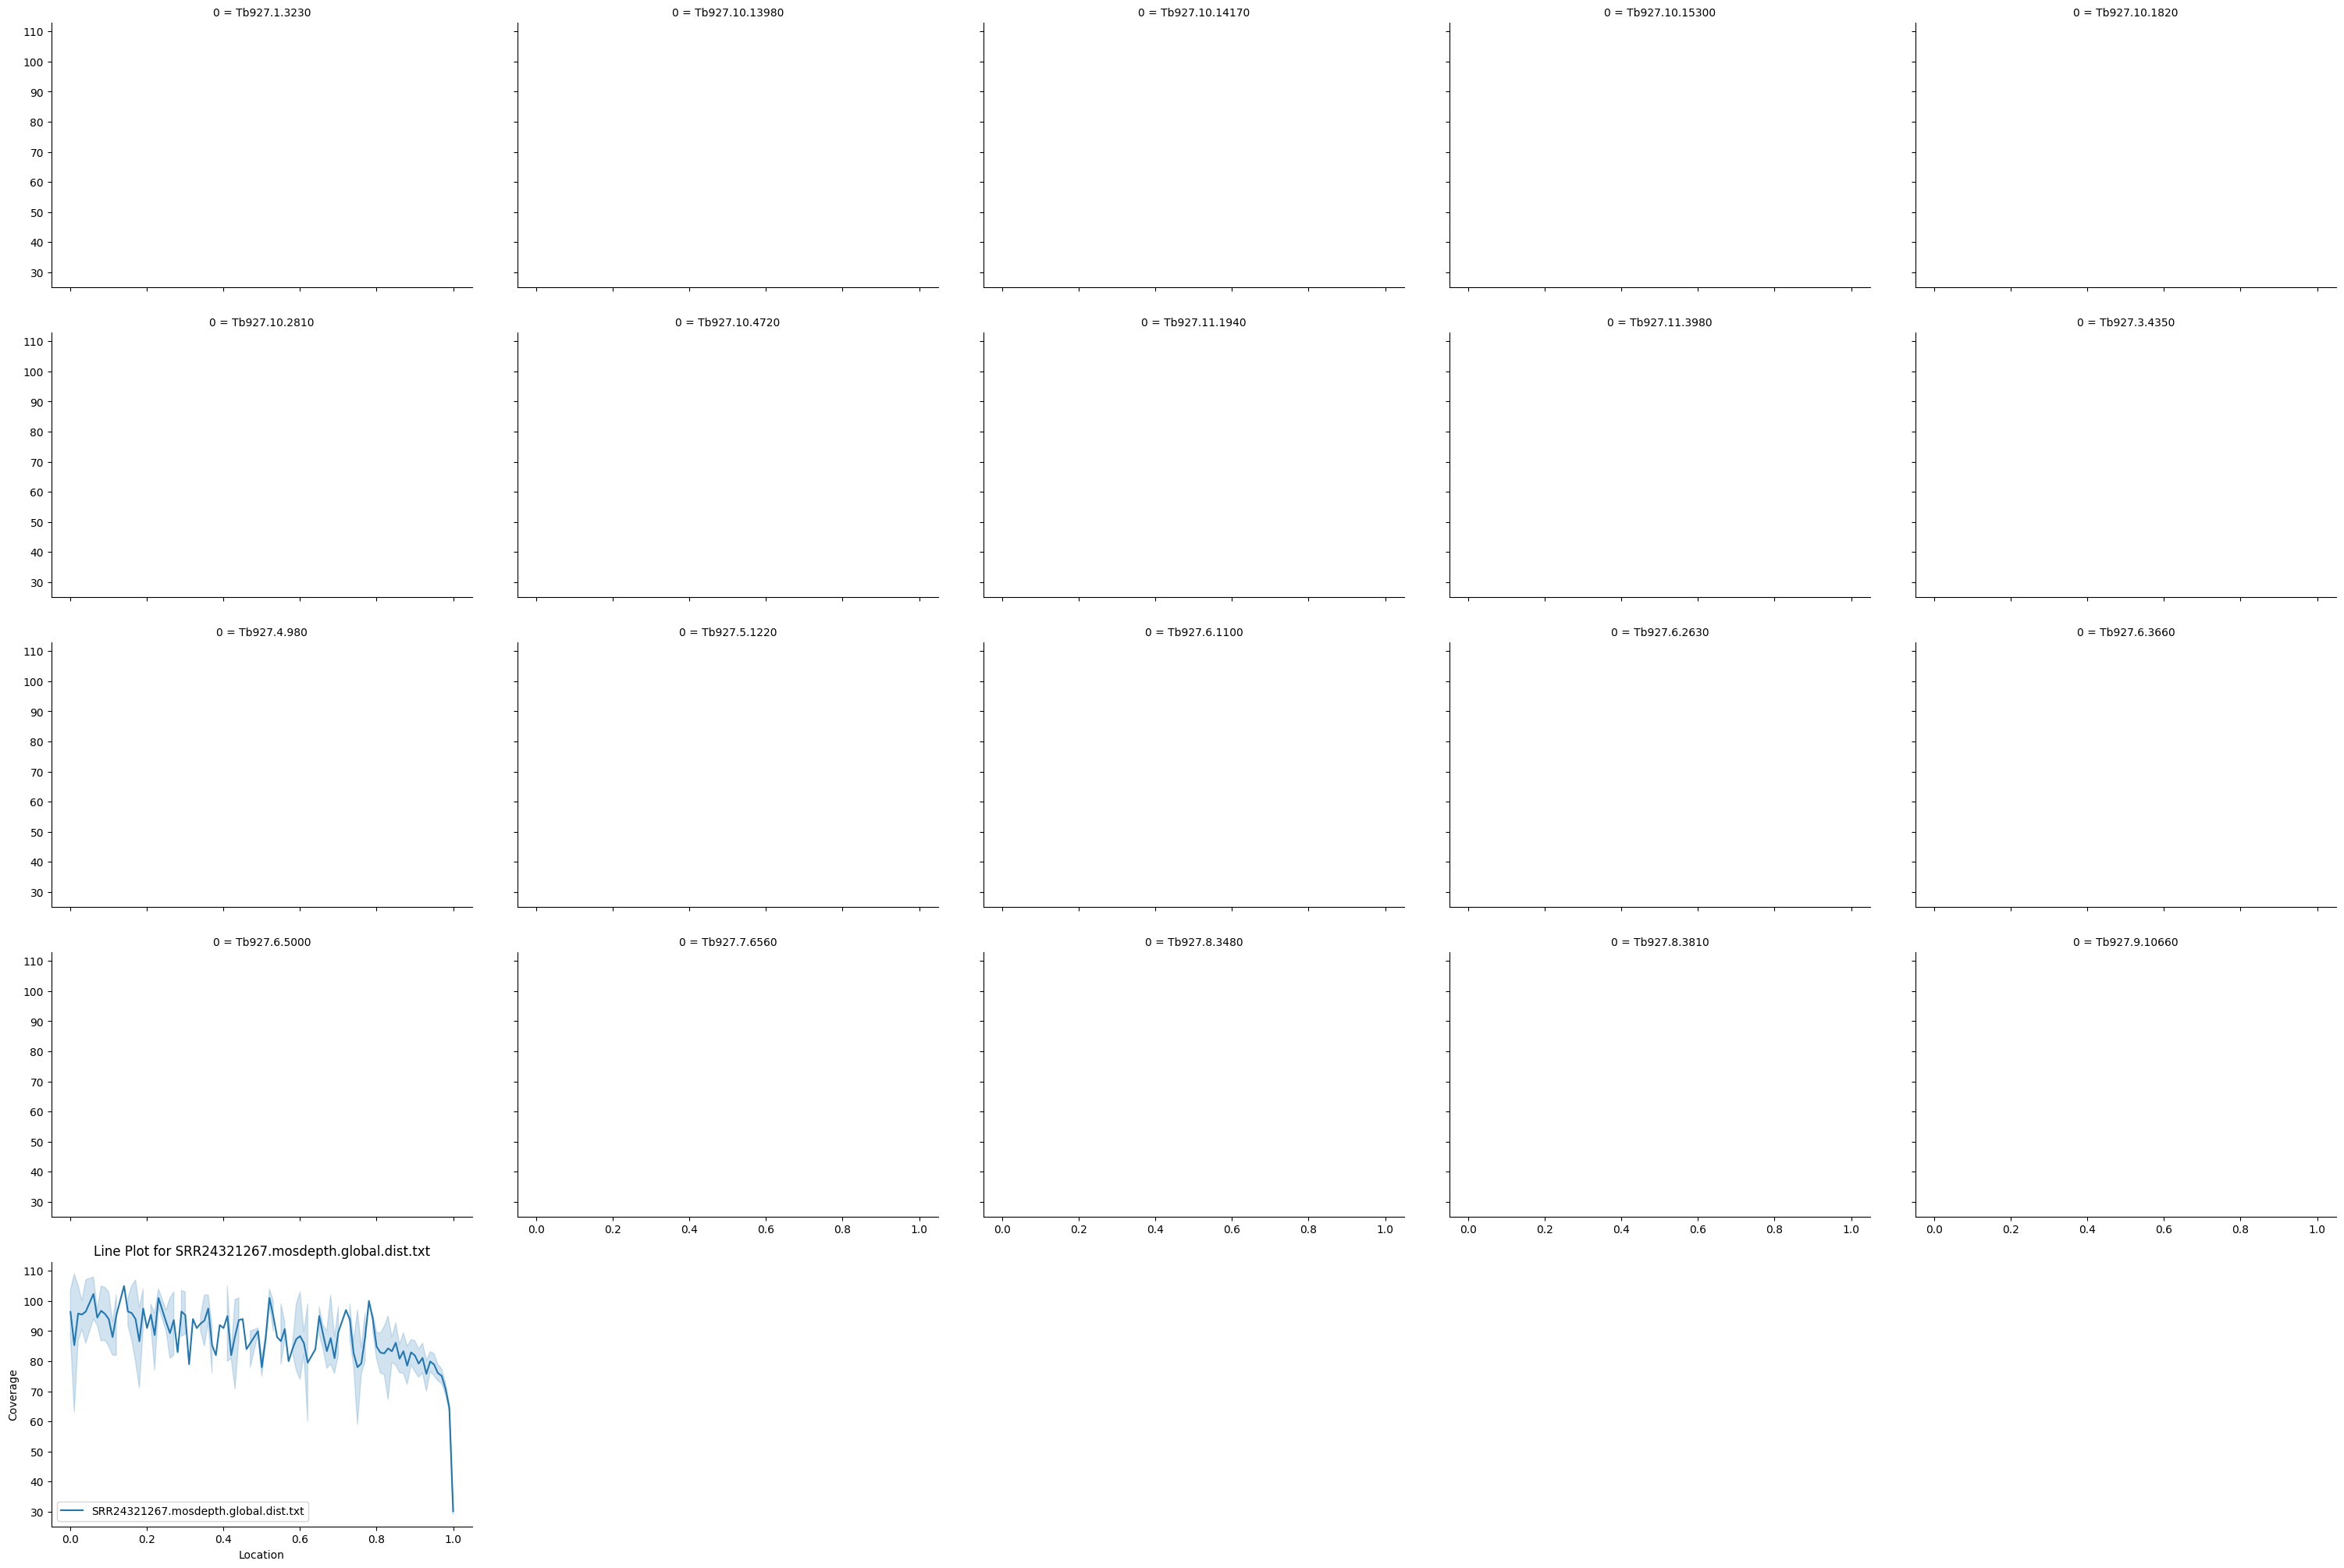

<Figure size 800x500 with 0 Axes>

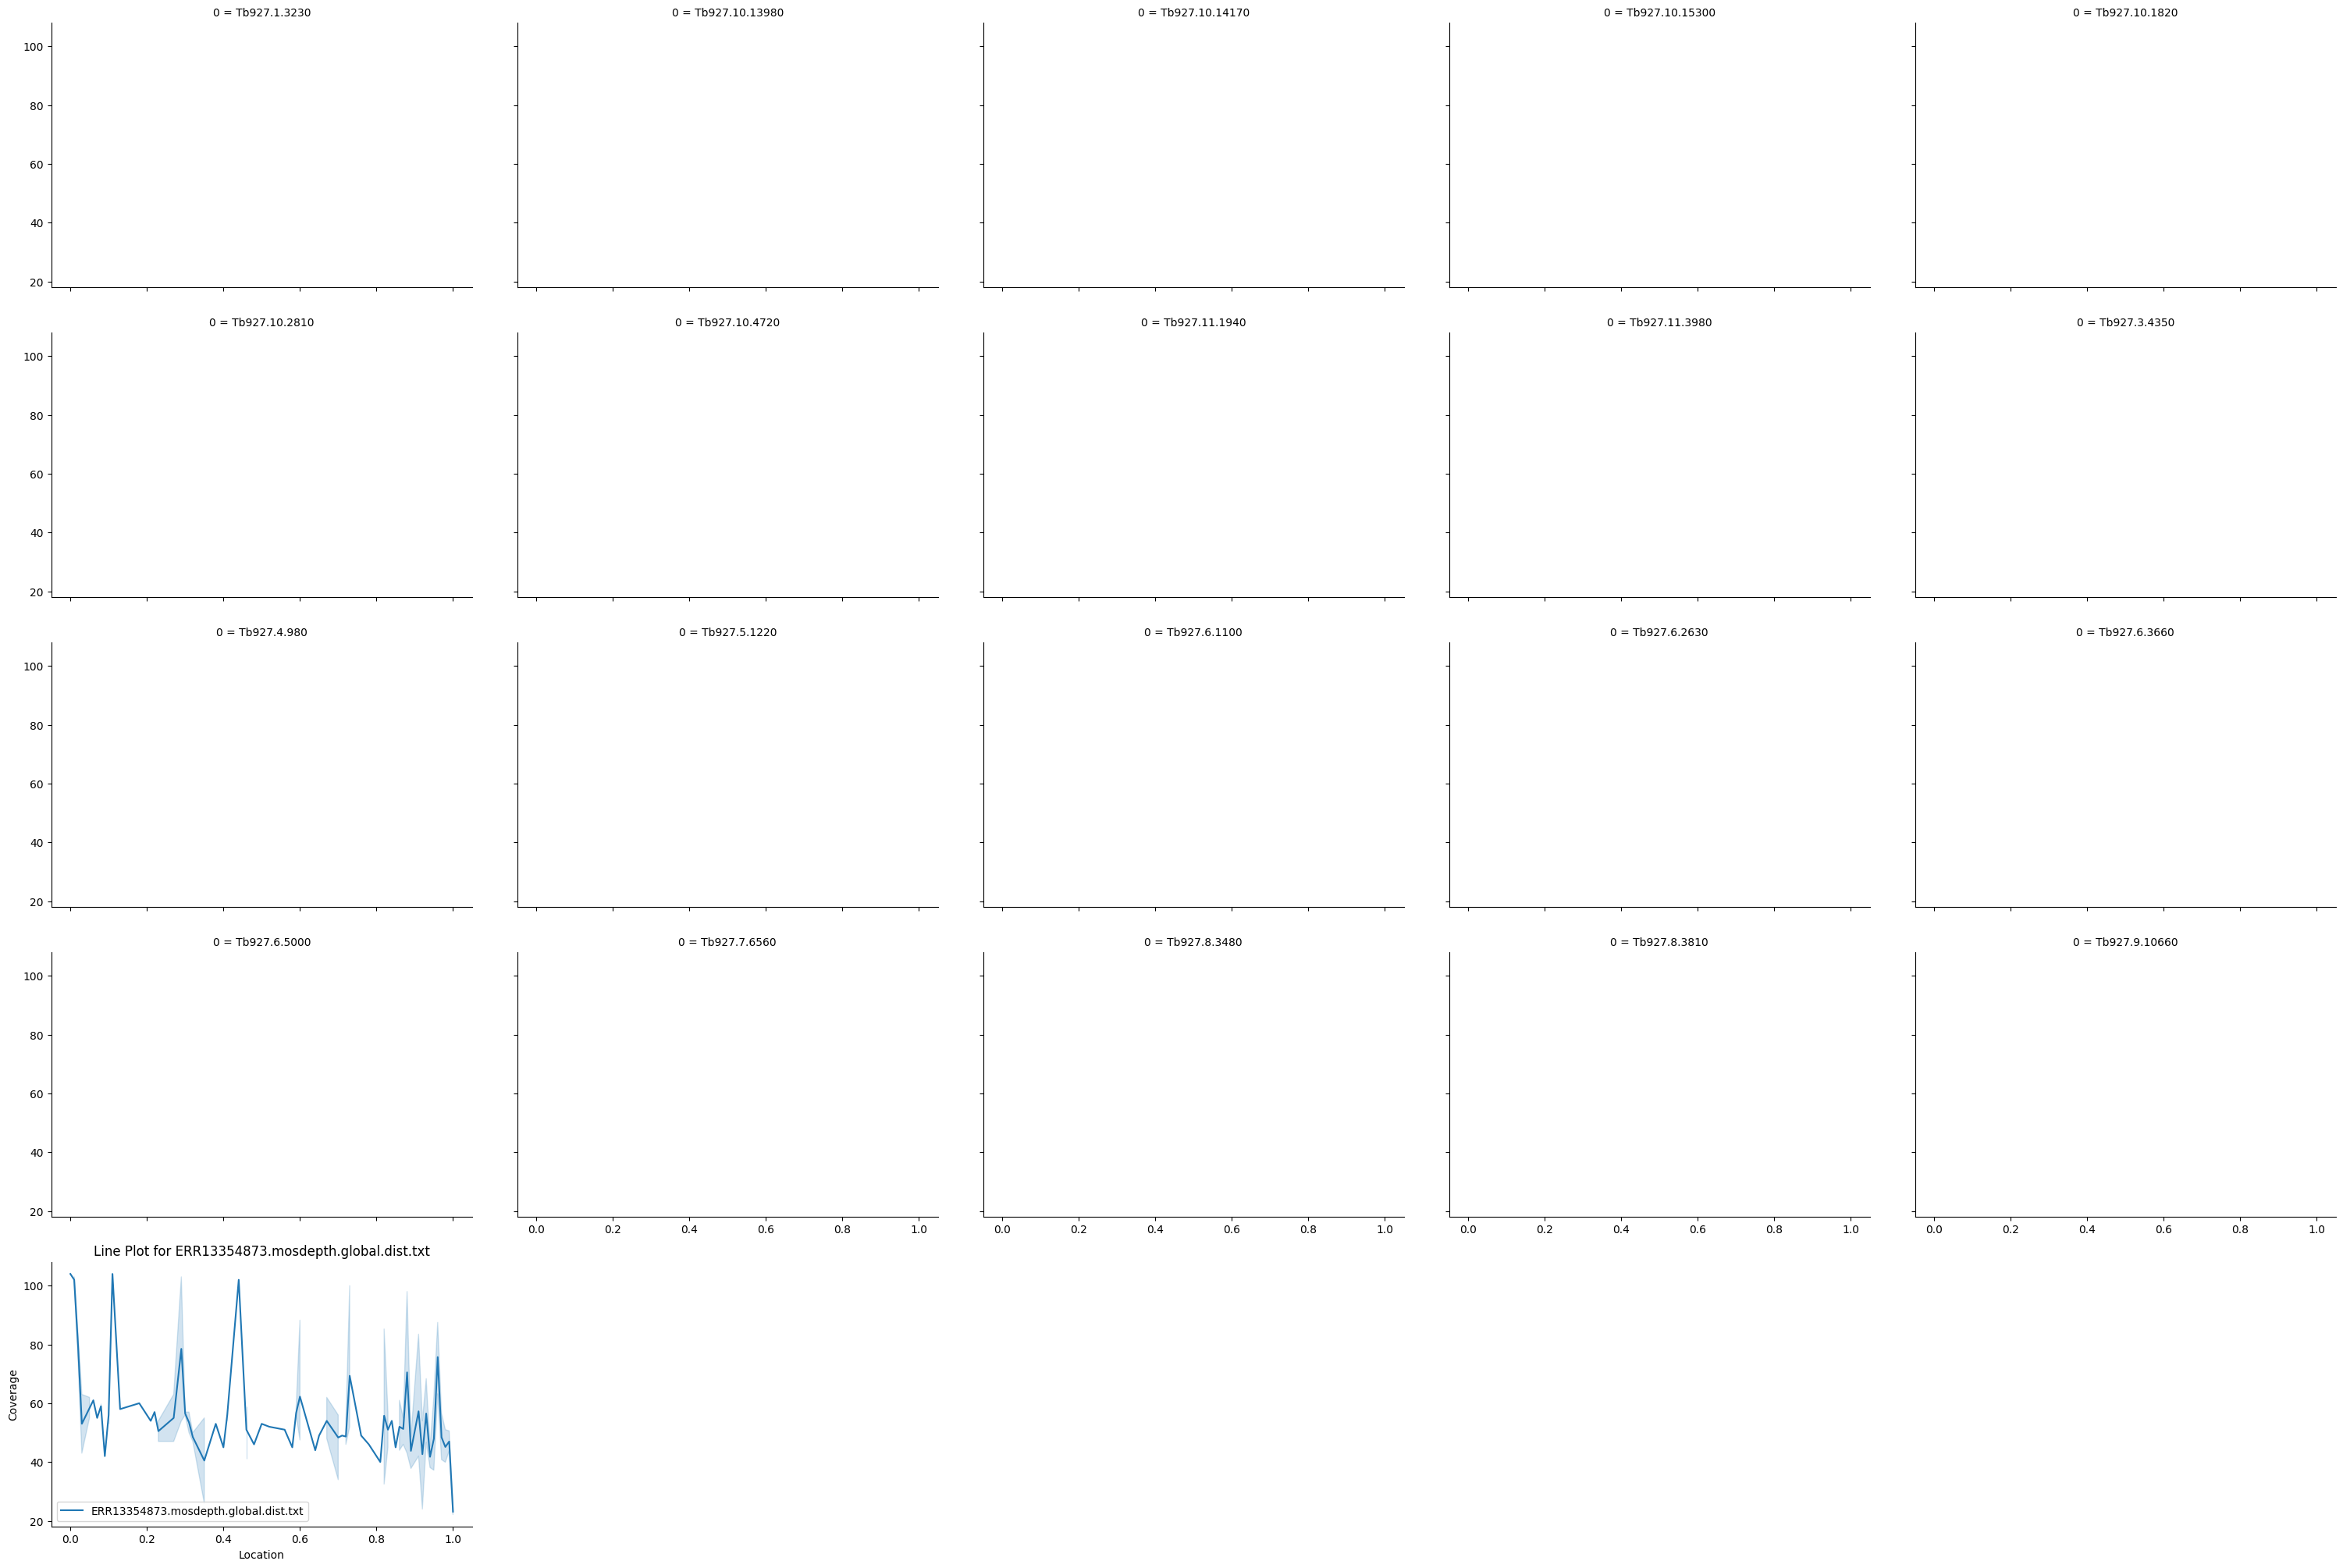

<Figure size 800x500 with 0 Axes>

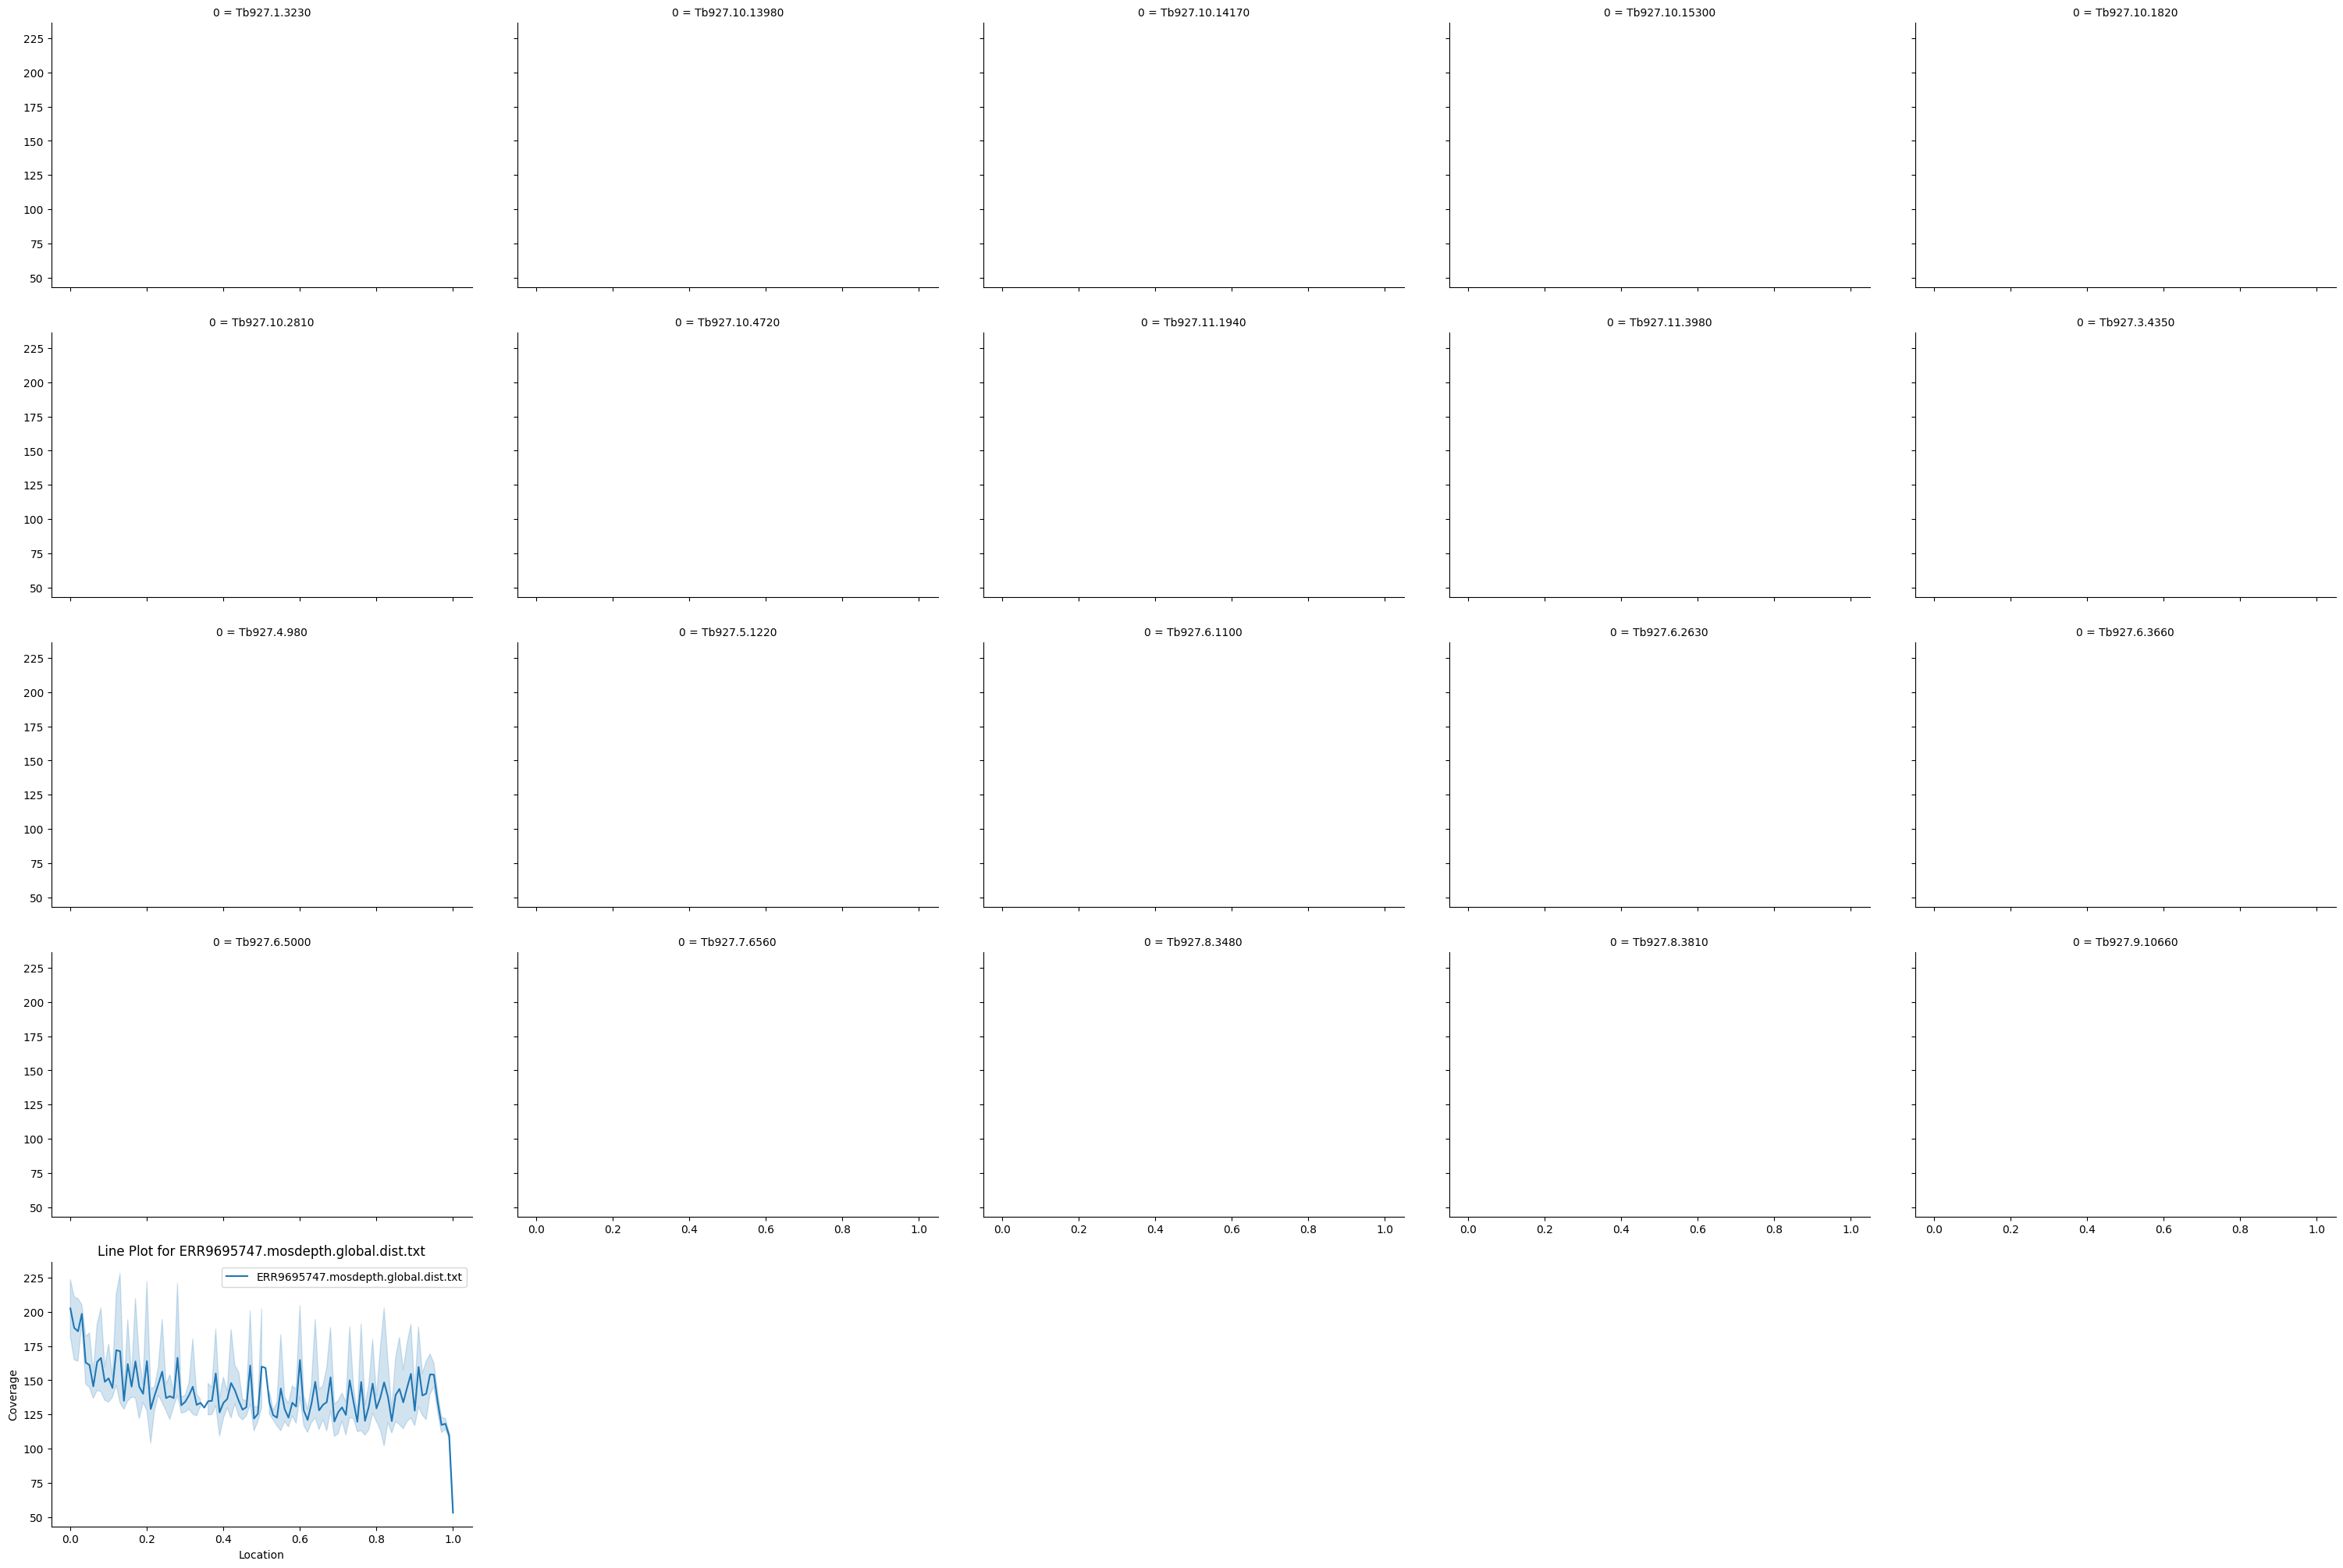

<Figure size 800x500 with 0 Axes>

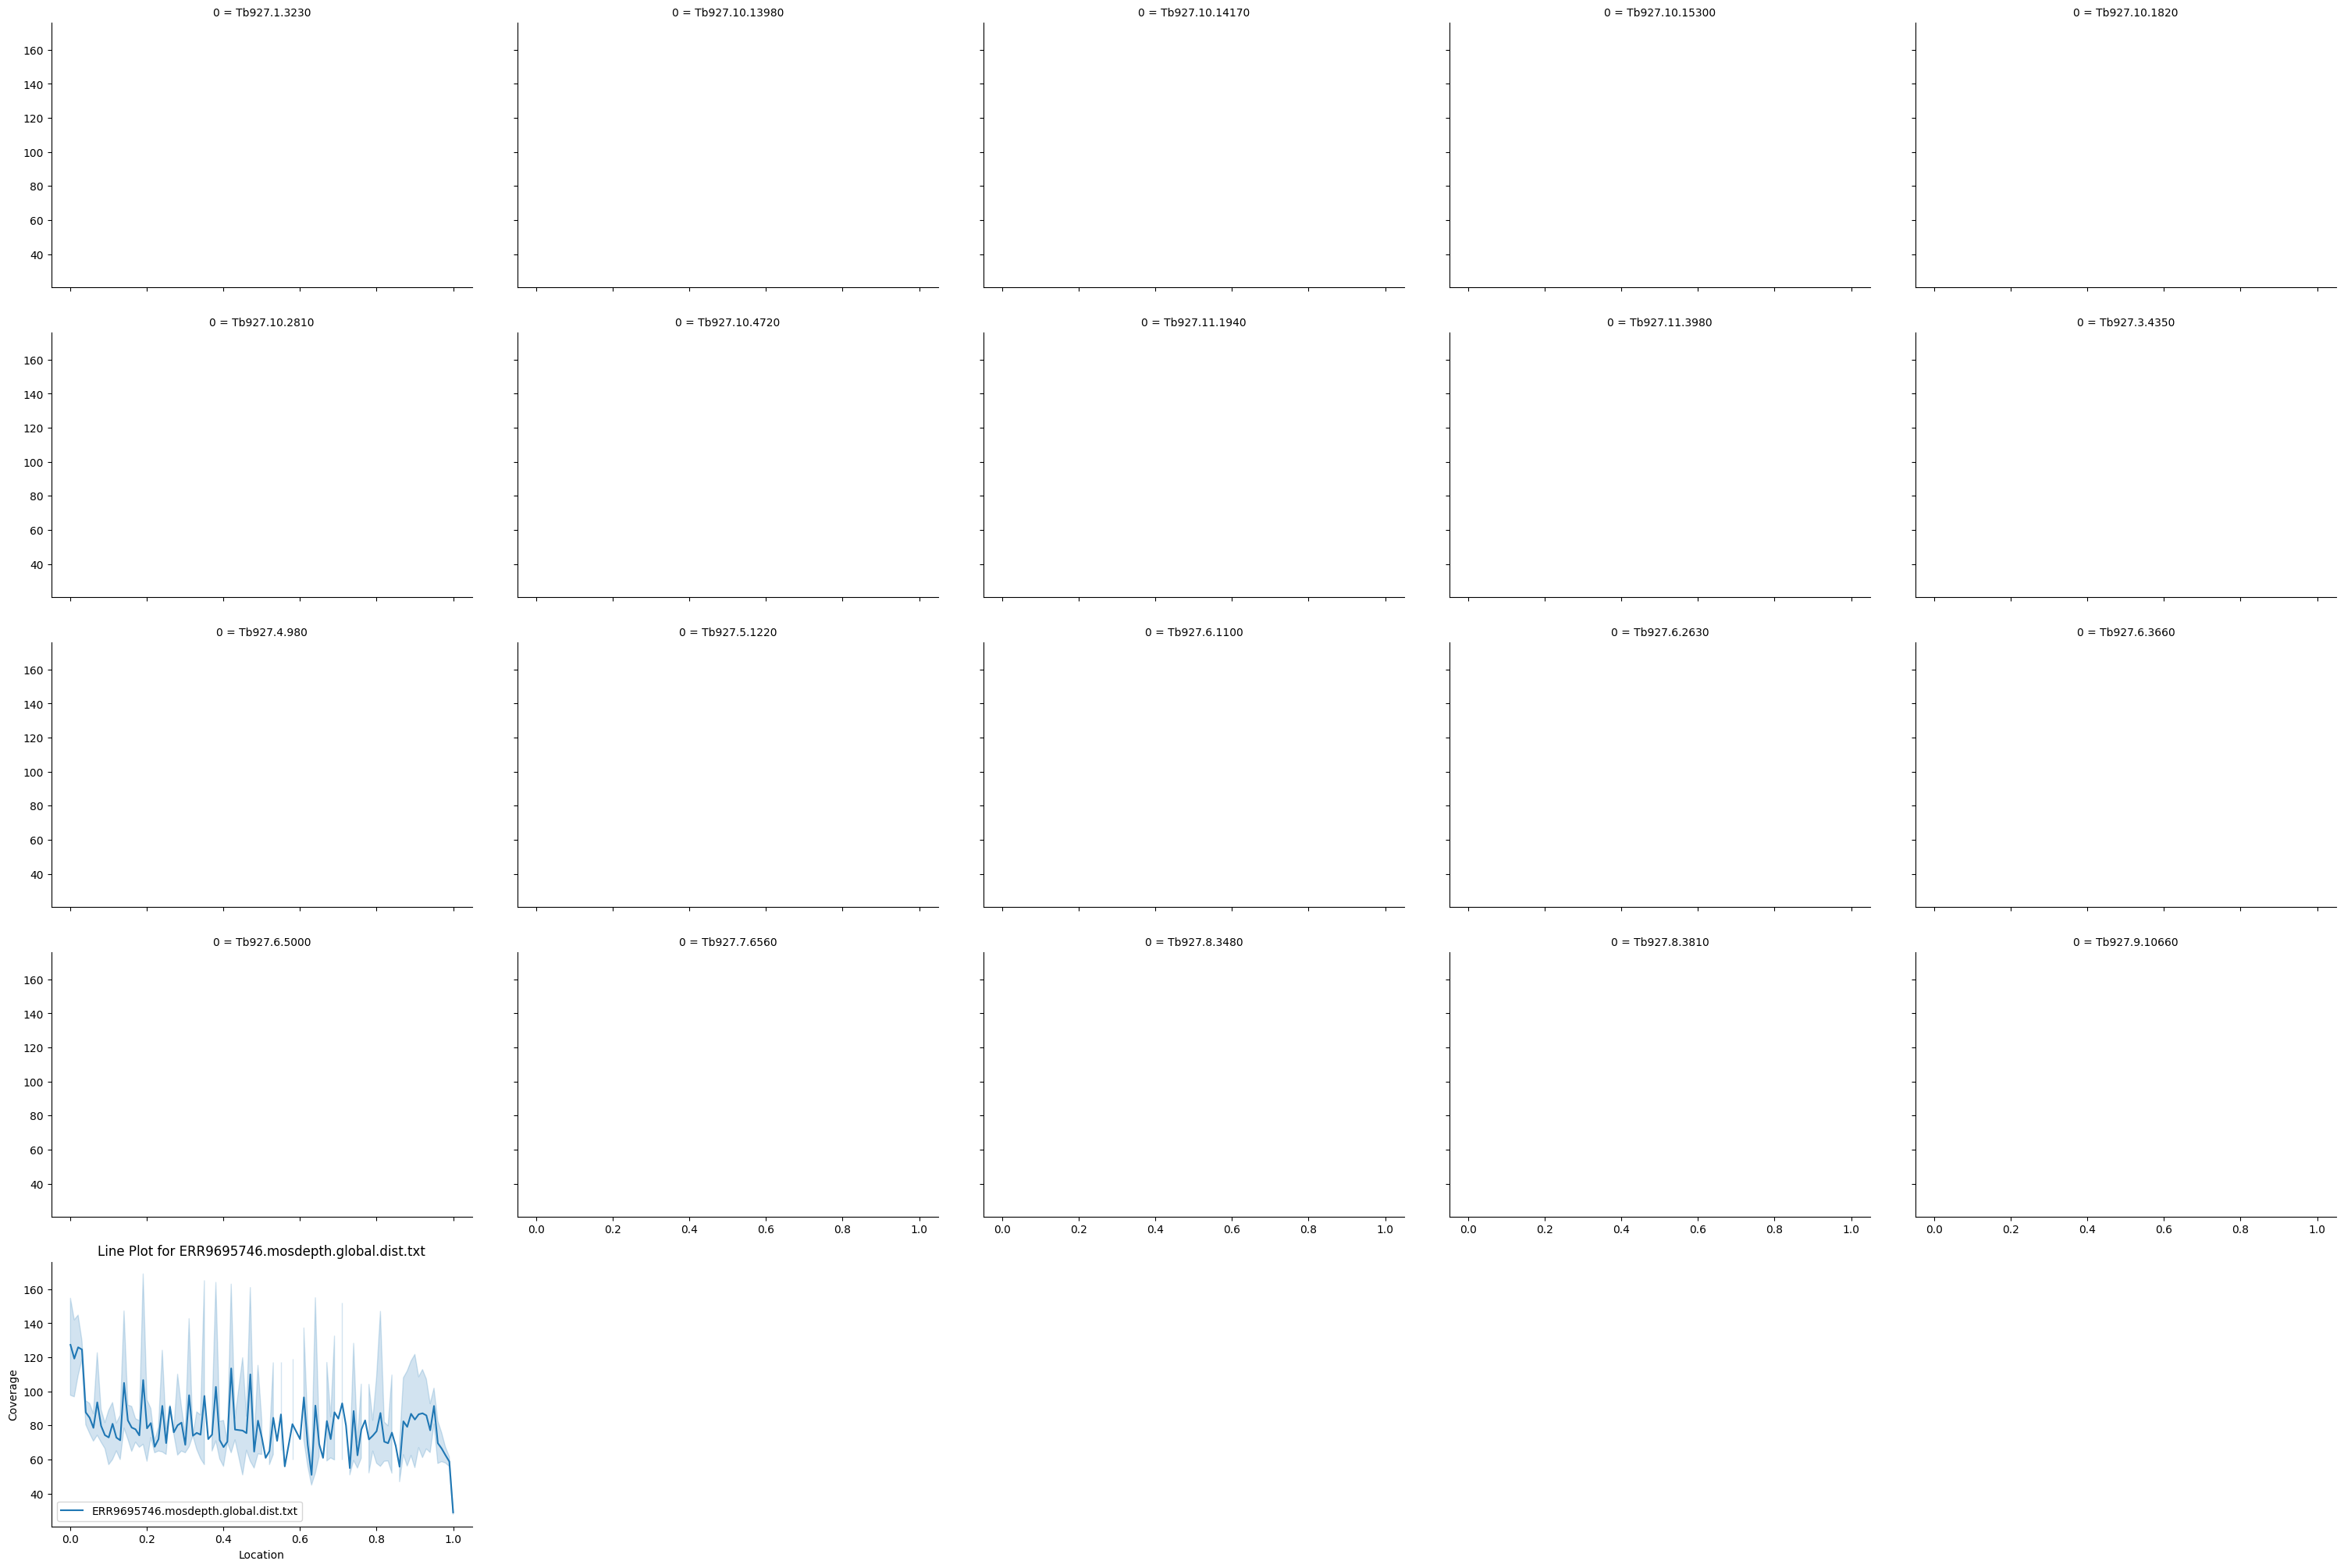

<Figure size 800x500 with 0 Axes>

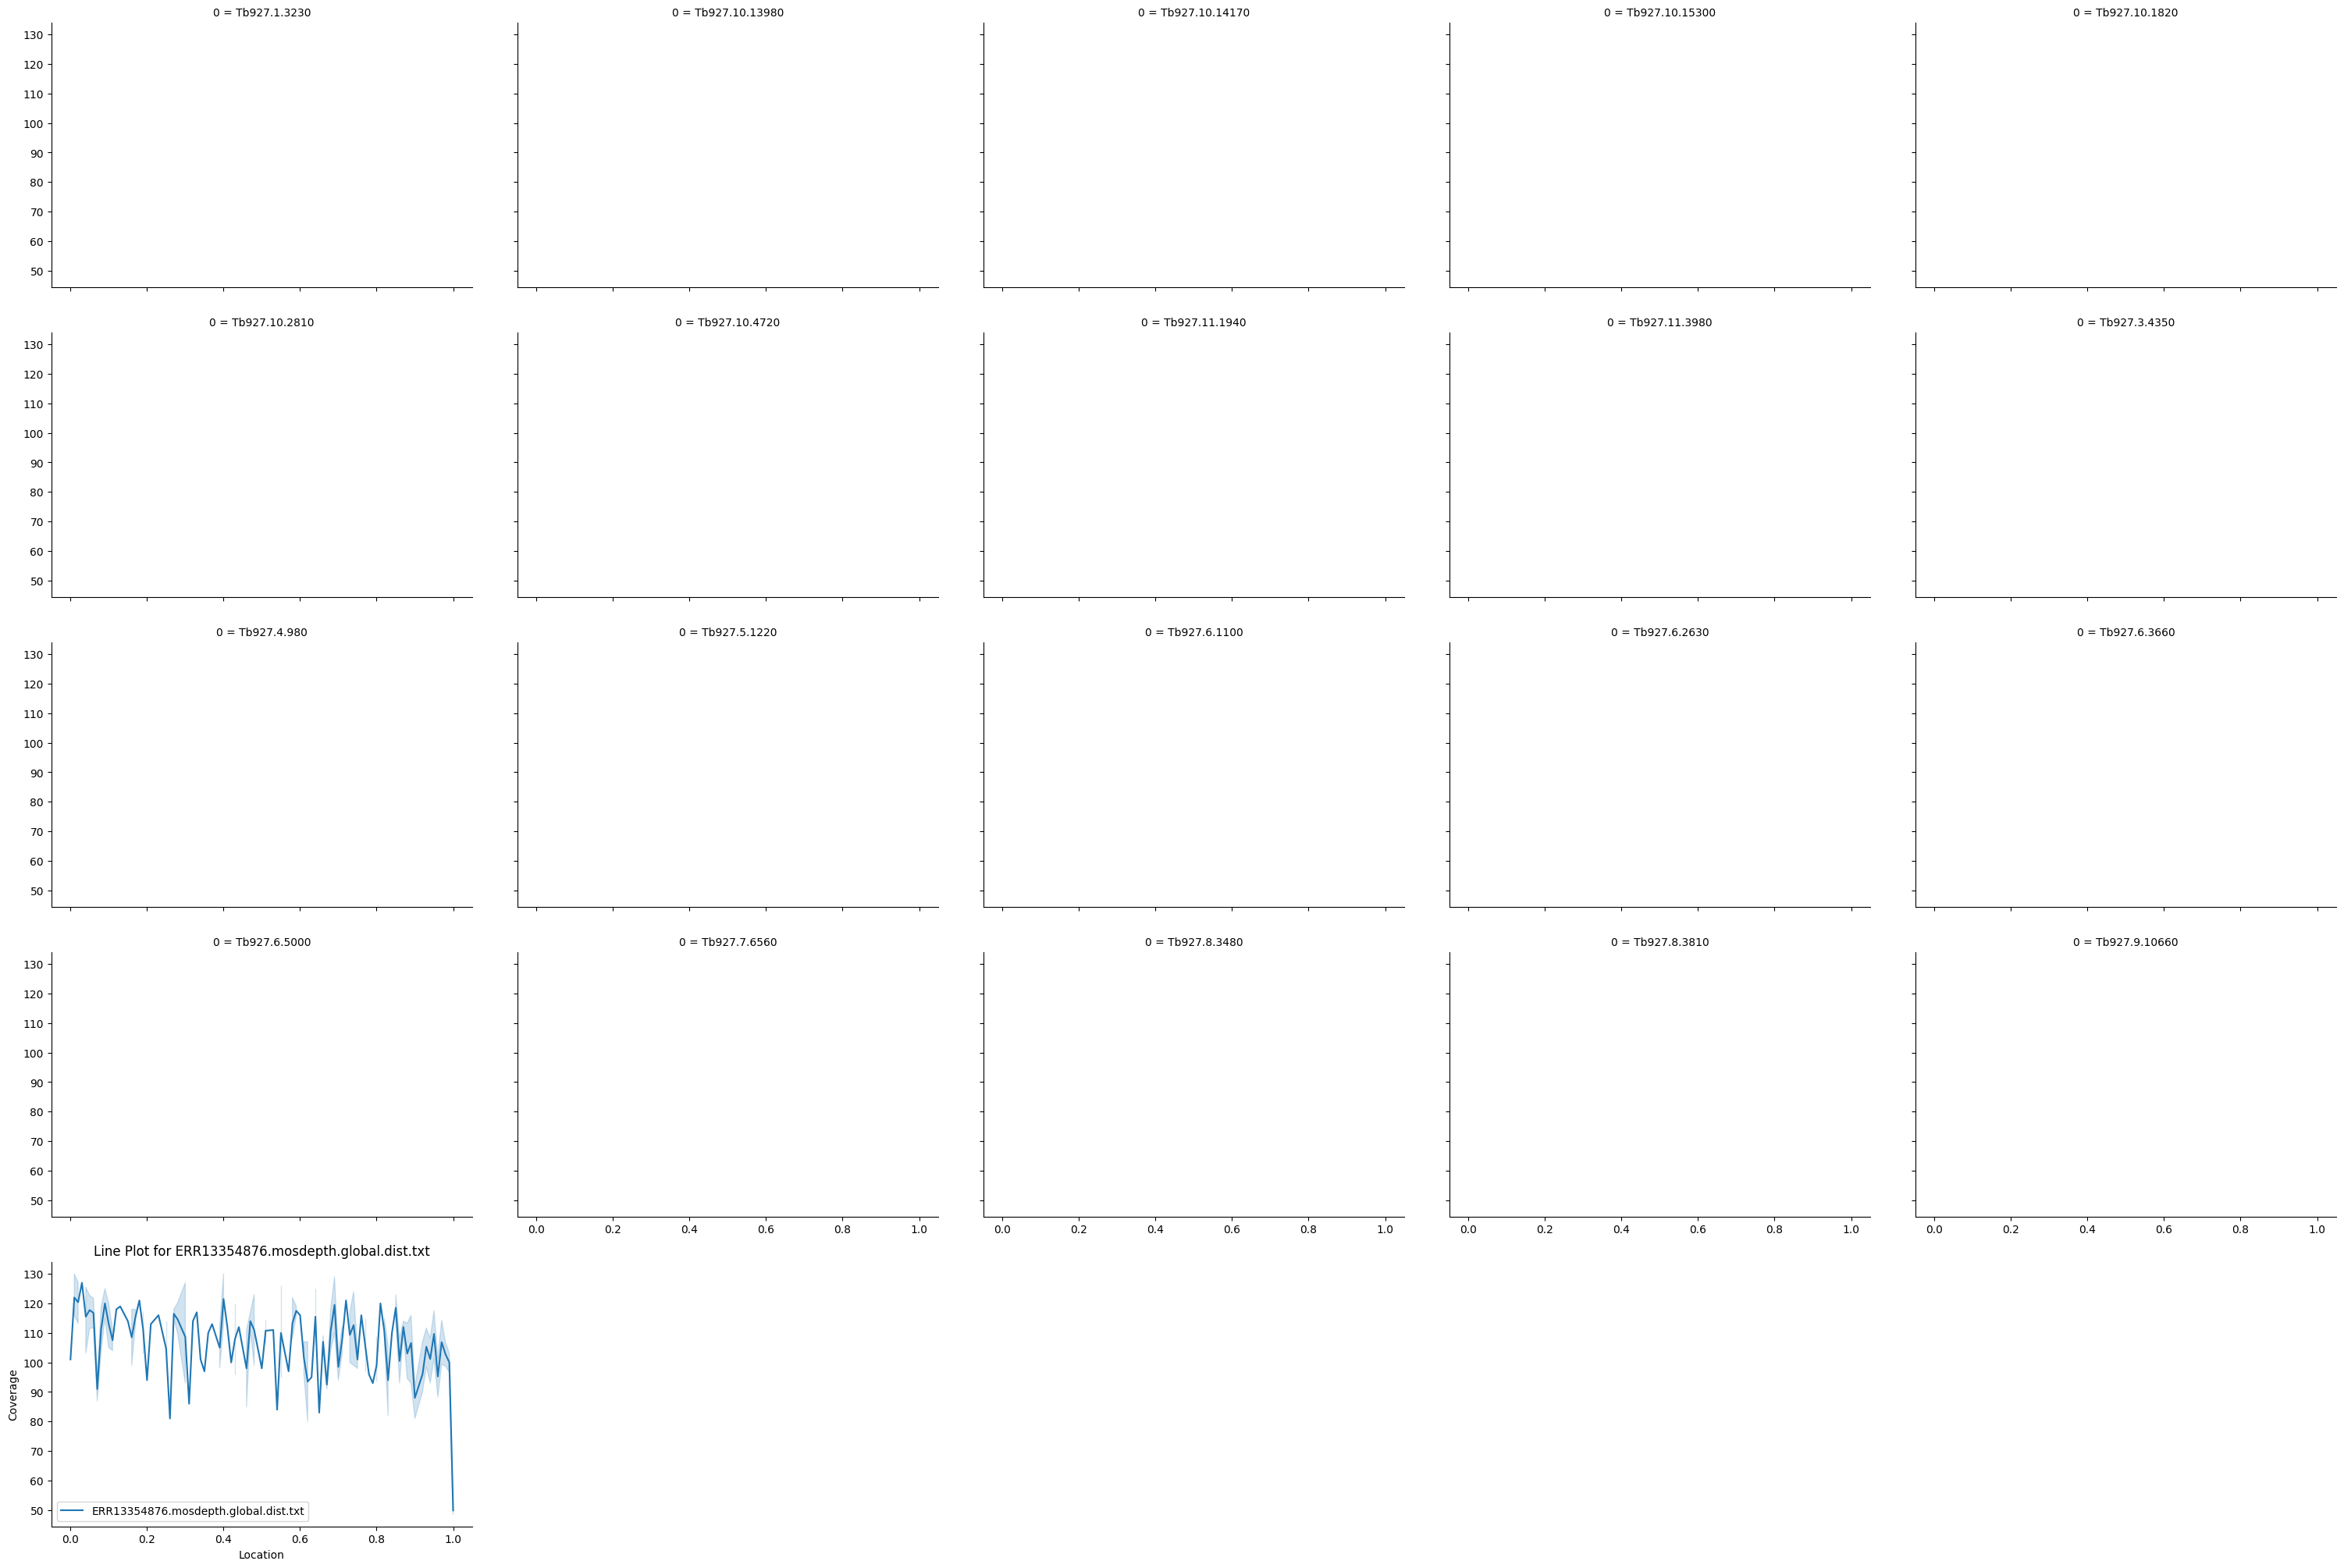

<Figure size 800x500 with 0 Axes>

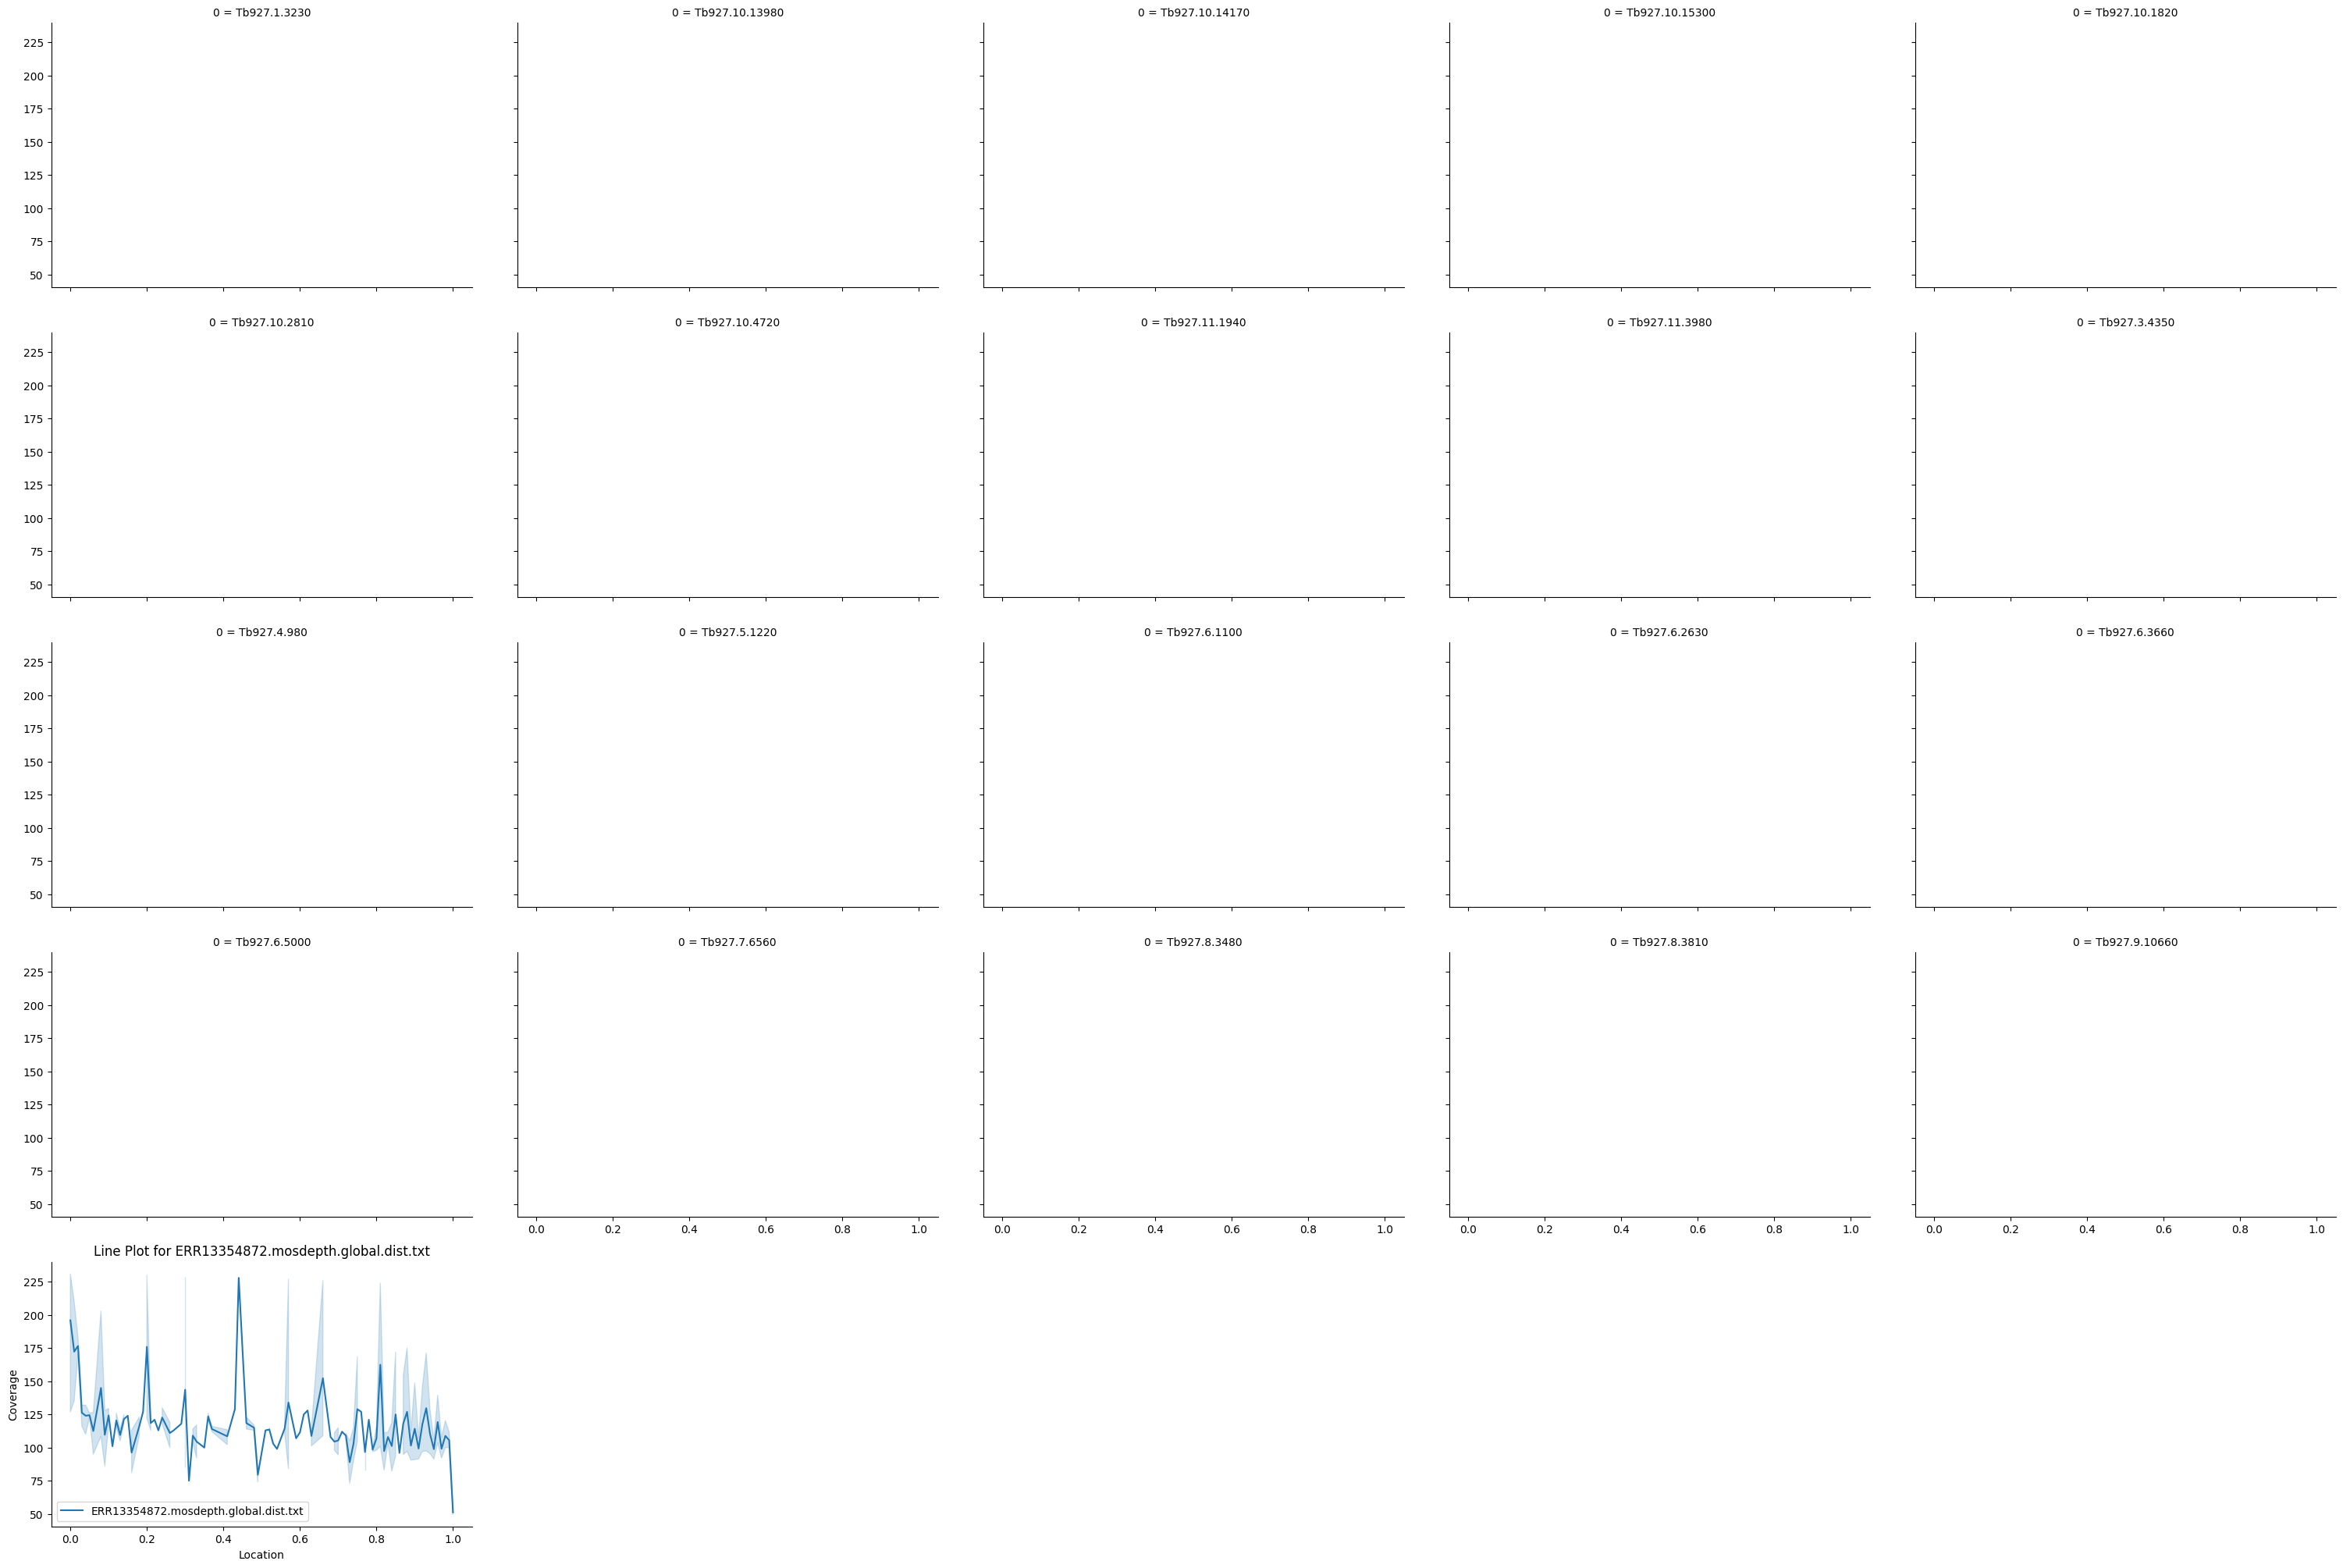

EmptyDataError: No columns to parse from file

In [21]:
import os 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns 
import csv 

csv_dir2 = '../workdir/Mosdepth/'

for isolate in os.listdir(csv_dir2):
    if isolate.endswith('.mosdepth.global.dist.txt'):
        file_path = os.path.join(csv_dir2, isolate)
        df = pd.read_csv(file_path, sep='\t', header=None, usecols=[0, 1, 2])
        plt.figure(figsize=(8, 5))
        g = sns.FacetGrid(df, col=0, height=4, aspect=1.5, col_wrap=num_cols)

        sns.lineplot(data=df, x=2, y=1, label=isolate)
        plt.xlabel("Location")
        plt.ylabel("Coverage")
        plt.title(f"Line Plot for {isolate}")
        plt.show()






In [28]:
import os 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns 
import csv

csv_dir = '../workdir/Mosdepth/'
output2_file = 'combined_raw.csv'
dataframes = []

for csv_file in os.listdir(csv_dir):
    if csv_file.endswith('.mosdepth.global.dist.txt'):
        file_path = os.path.join(csv_dir, csv_file)
        df = pd.read_csv(file_path, names=['GeneID', 'Coverage', 'Location'], sep='\t')
        df['source_file'] = os.path.splitext(csv_file)[0].split('.')[0]
        dataframes.append(df)

combined_df = pd.concat(dataframes, axis=0)
combined_df.to_csv(output2_file, index=False, sep='\t', quoting=csv.QUOTE_NONE, escapechar=' ')

plot_data = pd.read_csv('combined_raw.csv', sep='\t', usecols=['GeneID', 'Coverage', 'Location', 'source_file'])

plot_data['source_file'] = pd.Categorical(plot_data['source_file'], ordered=True)
num_genes = plot_data['source_file'].nunique()
num_cols = 5
num_rows = -(-num_genes // num_cols)

g = sns.FacetGrid(plot_data, row='source_file', col='GeneID', hue='source_file', height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x='Location', y='Coverage')
g.add_legend()

plt.show()  

/var/folders/vs/4d0w8drx4zdg1jl70nymtyt00000gn/T/ipykernel_65681/2241058985.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dataframes, axis=0)


In [3]:
pip install os

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib 


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
